# HW3 (Clustering)

#### Netid : aadcosta
#### Seating Pin : 79

In [1]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Data load and data Preprocessing

In [2]:
# Load your dataset (replace 'data.csv' with your actual data file)
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW3\\71-80.csv')

In [3]:

X_data = data.iloc[:, [3,4,5,6,7]]
y = data.iloc[:, [8]]

##### Part 1: Evaluation of number of components for Clustering

In [4]:
# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2,random_state=0)

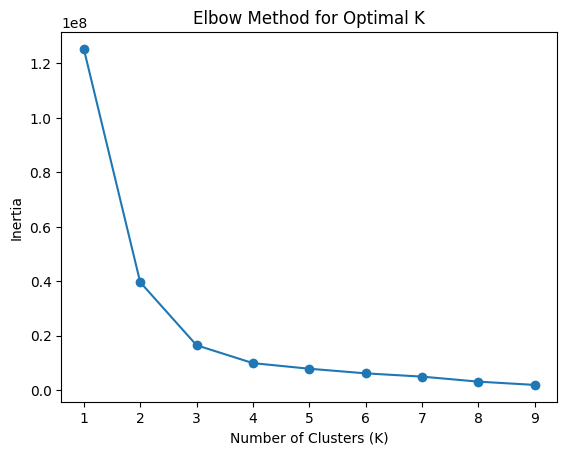

In [5]:
# Convert y_train and y_test from pandas DataFrame to numpy array
# y_train = y_train.to_numpy().ravel()
# y_test = y_test.to_numpy().ravel()

# Define a range of K values to evaluate
k_values = range(1, 10)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto' )
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


The "inertia," which represents the sum of squared distances of data points to their assigned cluster centroids.

##### Part 2: Prediction for the 2022 citation numbers for the test set, using the average difference magnitude to evaluate them

In [6]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0,n_init='auto')
kmeans.fit(X_train)

# Assign clusters to the training data
train_cluster_assignments = kmeans.predict(X_train)

In [7]:
train_cluster_assignments[:20]

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3])

In [8]:
y_train.head(20)

,cit_2022
43,202
62,267
3,81
71,228
45,85
48,446
6,98
99,156
82,107
76,345


In [9]:
# Predict clusters for test data
test_cluster_assignments = kmeans.predict(X_test)

In [10]:
test_cluster_assignments

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3])

In [11]:
len(kmeans.labels_)

80

In [12]:
kmeans.cluster_centers_

array([[ 104.0862069 ,  120.36206897,  130.29310345,  145.06896552,
         159.75862069],
       [2567.        , 2640.33333333, 2584.33333333, 2706.66666667,
        2578.66666667],
       [ 911.        , 1025.66666667, 1197.        , 1351.16666667,
        1454.        ],
       [ 522.92307692,  546.53846154,  562.76923077,  577.46153846,
         582.15384615]])

In [13]:
y_test

,cit_2022
26,163
86,3
2,613
55,164
75,62
93,39
16,221
73,256
54,88
95,333


In [30]:
predictions_neighbor = []
predictions_centroid = []
predictions_average = []
predictions_centroid_test = []
# Step 4: Calculate Predictions
for i in range(len(X_test)):
    test_cluster = test_cluster_assignments[i]
    
    # Extract data points from the same cluster in the training set
    train_data_in_cluster = X_train[train_cluster_assignments == test_cluster]
    y_data_in_cluster = y_train[train_cluster_assignments == test_cluster]
    
    # Calculate the nearest neighbor prediction
    distances = np.linalg.norm(X_train - X_test.iloc[i], axis=1)
    nearest_neighbor_index = np.argmin(distances)
    nearest_neighbor_prediction = y_train.iloc[nearest_neighbor_index][0]
    
    # Calculate the centroid prediction for train data
    cluster_centroid = kmeans.cluster_centers_[test_cluster]
    
    # Find the data point in the training set that is nearest to the cluster centroid
    distances_to_centroid = np.linalg.norm(X_train - cluster_centroid, axis=1)
    
    nearest_to_centroid_index = np.argmin(distances_to_centroid)
    
    # Make the prediction for the 2022 citation number
    centroid_prediction_train = y_train.iloc[nearest_to_centroid_index][0]

    # Calculate the centroid prediction for test data
    cluster_centroid = kmeans.cluster_centers_[test_cluster]
    
    # Find the data point in the test set that is nearest to the cluster centroid
    distances_to_centroid_test = np.linalg.norm(X_test - cluster_centroid, axis=1)
    nearest_to_centroid_index = np.argmin(distances_to_centroid_test)
    
    # Make the prediction for the 2022 citation number
    centroid_prediction_test = y_test.iloc[nearest_to_centroid_index][0]
    centroid_prediction = centroid_prediction_train

    # Pick the nearest point
    if centroid_prediction < centroid_prediction_test:
        centroid_prediction_test = centroid_prediction_train
    else:
        centroid_prediction_test = centroid_prediction_test
    
    # Calculate the average prediction
    average_prediction_distance = np.linalg.norm(y_train - y_data_in_cluster.mean(), axis=1)
    #average_val = np.linalg.norm(y_data_in_cluster.mean(), axis=1)
    average_index = np.argmin(average_prediction_distance)
    average_prediction = y_train.iloc[average_index][0]

    predictions_neighbor.append(nearest_neighbor_prediction)
    predictions_centroid.append(centroid_prediction)
    predictions_average.append(average_prediction)
    predictions_centroid_test.append(centroid_prediction_test)


In [15]:
predictions_neighbor

[103,
 15,
 746,
 173,
 67,
 33,
 173,
 446,
 65,
 268,
 479,
 163,
 479,
 15,
 374,
 49,
 33,
 346,
 986,
 345]

In [16]:
predictions_centroid

[173,
 173,
 638,
 173,
 173,
 173,
 173,
 173,
 173,
 638,
 173,
 173,
 173,
 173,
 173,
 173,
 173,
 173,
 1279,
 638]

In [31]:
predictions_average

[174,
 174,
 638,
 174,
 174,
 174,
 174,
 174,
 174,
 638,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 1279,
 638]

In [32]:
y_test_values = y_test.values.flatten()
# Step 5: Evaluate Predictions
# Calculate the average difference magnitude for each type of prediction (1, 2, 3)
differences_neighbor = np.abs(predictions_neighbor - y_test_values)
differences_centroid = np.abs(predictions_centroid - y_test_values)
differences_average = np.abs(predictions_average - y_test_values)
differences_centroid_test = np.abs(predictions_centroid_test - y_test_values)

In [19]:
1 - np.mean(np.abs(predictions_neighbor - y_test_values)/y_test_values)

0.5333831037698458

In [43]:
print(f"Mean absolute Percentage Error: {np.mean(np.abs((predictions_neighbor - y_test_values)/y_test_values)) * 100} ")

Mean absolute Percentage Error: 46.66168962301542 


In [41]:
print(f"Mean absolute Percentage Error: {np.mean(np.abs((predictions_centroid - y_test_values)/y_test_values)) * 100} ")

Mean absolute Percentage Error: 389.8026989193447 


In [42]:
print(f"Mean absolute Percentage Error: {np.mean(np.abs((predictions_average - y_test_values)/y_test_values)) * 100} ")

Mean absolute Percentage Error: 392.0996205101294 


In [25]:
np.mean(np.abs(predictions_neighbor - y_test_values))

68.1

In [27]:
np.min(np.abs(predictions_neighbor - y_test_values)), np.max(np.abs(predictions_neighbor - y_test_values))

(5, 204)

In [20]:
print(f"Average difference magnitude of test data points same as of nearest neighbour point from training set is {np.mean(differences_neighbor)}")

Average difference magnitude of test data points same as of nearest neighbour point from training set is 68.1


In [21]:
print(f"Average difference magnitude of test data points same as of the point near their cluster centroid  is {np.mean(differences_centroid)}")

Average difference magnitude of test data points same as of the point near their cluster centroid  is 169.75


In [33]:
print(f"Average difference magnitude of test data points same as of the average of all other points in the same cluster of training set is {np.mean(differences_average)}")

Average difference magnitude of test data points same as of the average of all other points in the same cluster of training set is 169.95


In [23]:
np.mean(differences_centroid_test)

131.1